In [1]:
import os
import pandas as pd
pd.set_option('display.max_columns', None)
from dotenv import load_dotenv
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
print(os.getcwd())

c:\Users\itadi\Desktop\data-science\DA\oil_data_exploration


In [3]:
load_dotenv();

#### Loading data and data cleaning

In [5]:
base_ngl_data_name = 'ngl_'
base_vol_data_name = 'vol_'
months = 10

drilling_events = pd.read_excel(os.getenv('DRILLING_EVENT'), skiprows=2)
for month in range(1, months):
    if month == 9:
        df_name = f'{base_vol_data_name}{month}'
        globals()[df_name] = pd.read_csv(os.getenv('VOL_DATA').replace('XX', f'0{month}'), low_memory=False)
    else: 
        df_name = f'{base_ngl_data_name}{month}'
        globals()[df_name] = pd.read_csv(os.getenv('NGL_DATA').replace('XX', f'0{month}'), low_memory=False)
        df_name = f'{base_vol_data_name}{month}'
        globals()[df_name] = pd.read_csv(os.getenv('VOL_DATA').replace('XX', f'0{month}'), low_memory=False)

In [6]:
merged_ngl_df = pd.concat([ngl_1, ngl_2, ngl_3, ngl_4, ngl_5, ngl_6, ngl_7, ngl_8], ignore_index=True)

In [7]:
merged_vol_df = pd.concat([vol_6, vol_7, vol_8], ignore_index=True)

In [8]:
production_data = pd.read_csv(os.getenv('PRODUCTION'), low_memory=False)
minable_oil_sands_well_data = pd.read_csv(os.getenv('MINABLE_WELL_DATA'), low_memory=False)
well_infrastructure = pd.read_csv(os.getenv('WELL_INFRASTRUCTURE'), low_memory=False)

In [9]:
drilling_events.shape

(849, 7)

In [10]:
drilling_events.isnull().sum()

Well Licence Number    0
UWI with /9            0
Total Depth            0
Spud Date              0
Rig Release Date       0
Date Updated Date      0
Total # of ES          0
dtype: int64

In [11]:
merged_ngl_df.shape

(864071, 26)

In [12]:
merged_ngl_df.isnull().sum()

ReportingFacilityID       13716
ReportingFacilityName     13716
OperatorBAID              13716
OperatorName              13716
ProductionMonth               0
WellID                        0
WellLicenseNumber         13527
Field                     13527
Pool                      89728
Area                     828035
Hours                         0
GasProduction                 0
OilProduction                 0
CondensateProduction          0
WaterProduction               0
ResidueGasVolume              0
Energy                        0
EthaneMixVolume               0
EthaneSpecVolume              0
PropaneMixVolume              0
PropaneSpecVolume             0
ButaneMixVolume               0
ButaneSpecVolume              0
PentaneMixVolume              0
PentaneSpecVolume             0
LiteMixVolume                 0
dtype: int64

In [13]:
threshold = 0.7 * len(merged_ngl_df)
merged_ngl_df = merged_ngl_df.dropna(axis=1, thresh=threshold)

In [14]:
merged_vol_df.shape

(1617716, 30)

In [15]:
merged_vol_df.isnull().sum()

ProductionMonth                         0
OperatorBAID                            0
OperatorName                            0
ReportingFacilityID                     0
ReportingFacilityProvinceState          0
ReportingFacilityType                   0
ReportingFacilityIdentifier             0
ReportingFacilityName                   0
ReportingFacilitySubType                0
ReportingFacilitySubTypeDesc            0
ReportingFacilityLocation               0
FacilityLegalSubdivision                0
FacilitySection                         0
FacilityTownship                        0
FacilityRange                           0
FacilityMeridian                        0
SubmissionDate                         44
ActivityID                          23970
ProductID                           74653
FromToID                           276936
FromToIDProvinceState              325331
FromToIDType                       325331
FromToIDIdentifier                 280889
Volume                            

In [16]:
threshold = 0.7 * len(merged_vol_df)
merged_vol_df = merged_vol_df.dropna(axis=1, thresh=threshold)

In [17]:
production_data.shape

(680, 5)

In [18]:
production_data.isnull().sum()

Date             0
Oil Monthly      0
Gas Monthly      0
Water Monthly    0
Wells Monthly    0
dtype: int64

In [19]:
minable_oil_sands_well_data.shape

(236, 14)

In [20]:
minable_oil_sands_well_data.isnull().sum()

BHID         0
CPA-ID      40
X83          0
Y83          0
Z            0
FROM         0
TO           0
LENGTH       0
CORGR        0
CALEGR       0
GRADE        0
SHALE        0
POROSITY     0
WATER        0
dtype: int64

In [21]:
well_infrastructure.shape

(658134, 72)

In [22]:
well_infrastructure.isnull().sum()

WellID                        0
WellProvinceState             0
WellType                      0
WellIdentifier                0
WellLocationException         0
                          ...  
LicenceIssueDate              0
LicenceStatusDate           153
LicenceStatus                 0
PreviousWellID           605139
OrphanWellFlg                 0
Length: 72, dtype: int64

In [23]:
len(well_infrastructure['LicenseeName'].unique())

3253

In [24]:
threshold = 0.7 * len(well_infrastructure)
well_infrastructure = well_infrastructure.dropna(axis=1, thresh=threshold)

In [25]:
merged_ngl_df.columns
merged_ngl_df.info()
merged_ngl_df.dropna(ignore_index=True , inplace=True)
merged_ngl_df.drop(['ReportingFacilityID', 'ReportingFacilityName', 'OperatorBAID', 'OperatorName', 'WellID', 'Field', 'Pool', 'Hours'], axis=1, inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864071 entries, 0 to 864070
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ReportingFacilityID    850355 non-null  object 
 1   ReportingFacilityName  850355 non-null  object 
 2   OperatorBAID           850355 non-null  object 
 3   OperatorName           850355 non-null  object 
 4   ProductionMonth        864071 non-null  object 
 5   WellID                 864071 non-null  object 
 6   WellLicenseNumber      850544 non-null  object 
 7   Field                  850544 non-null  float64
 8   Pool                   774343 non-null  float64
 9   Hours                  864071 non-null  int64  
 10  GasProduction          864071 non-null  float64
 11  OilProduction          864071 non-null  float64
 12  CondensateProduction   864071 non-null  float64
 13  WaterProduction        864071 non-null  float64
 14  ResidueGasVolume       864071 non-nu

In [26]:
print(well_infrastructure['LicenceStatus'].unique())

status_mapping = {
    'RecExempt': 'RECEXEMPT',
    'Suspension': 'SUSPENSION',
    'Issued': 'ISSUED',
    'Abandoned': 'ABANDONED',
    'Re-Entered': 'RE-ENTERED',
    'Amended': 'AMENDED',
    'RecCertified': 'RECCERTIFIED'
}

well_infrastructure['LicenceStatus'] = well_infrastructure['LicenceStatus'].replace(status_mapping)

['RecExempt' 'SUSPENSION' 'ABANDONED' 'RECCERTIFIED' 'RecCertified'
 'ISSUED' 'AMENDED' 'Abandoned' 'RECEXEMPT' 'Issued' 'Suspension'
 'Amended' 'Re-Entered' 'RE-ENTERED']


In [27]:
merged_ngl_df['WellLicenseNumber'].unique()
merged_ngl_df['WellLicenseNumber'] = merged_ngl_df['WellLicenseNumber'].str.lstrip('0')

In [28]:
well_infrastructure['WellStatusDate'] = pd.to_datetime(well_infrastructure['WellStatusDate'])

well_infrastructure['Year'] = well_infrastructure['WellStatusDate'].dt.year

well_infrastructure['Decade'] = (well_infrastructure['Year'] // 10) * 10

#### Data Visualization

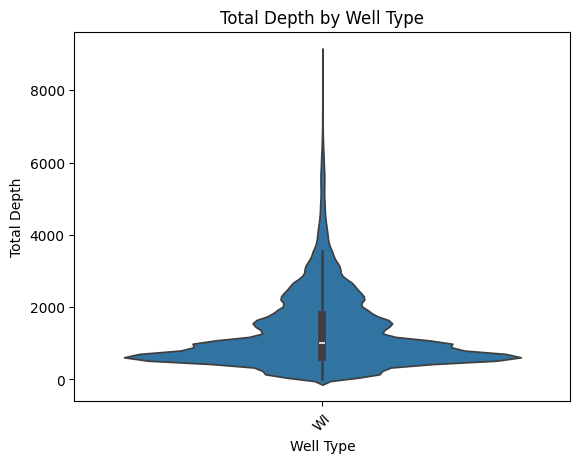

In [29]:
sns.violinplot(data=well_infrastructure, x='WellType', y='FinalTotalDepth')
plt.title("Total Depth by Well Type")
plt.xlabel("Well Type")
plt.ylabel("Total Depth")
plt.xticks(rotation=45)
plt.show()

In [30]:
Q1 = well_infrastructure['FinalTotalDepth'].quantile(0.25)
Q3 = well_infrastructure['FinalTotalDepth'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = well_infrastructure[
    (well_infrastructure['FinalTotalDepth'] < lower_bound) |
    (well_infrastructure['FinalTotalDepth'] > upper_bound)
]

print("Outliers:", len(outliers))

Outliers: 23977


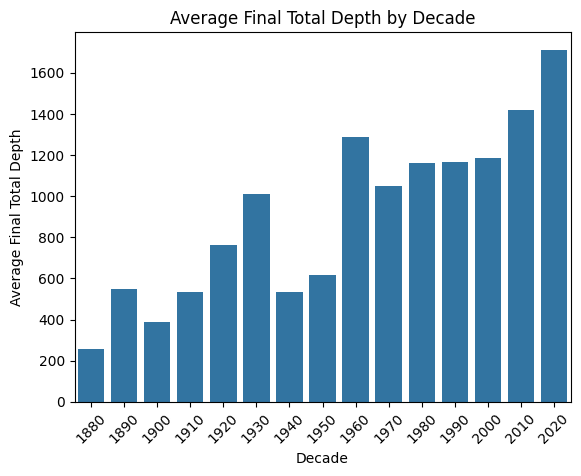

In [31]:
decade_depth = well_infrastructure.groupby('Decade')['FinalTotalDepth'].mean().reset_index()

sns.barplot(data=decade_depth, x='Decade', y='FinalTotalDepth')
plt.title("Average Final Total Depth by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Final Total Depth")
plt.xticks(rotation=45)
plt.show()

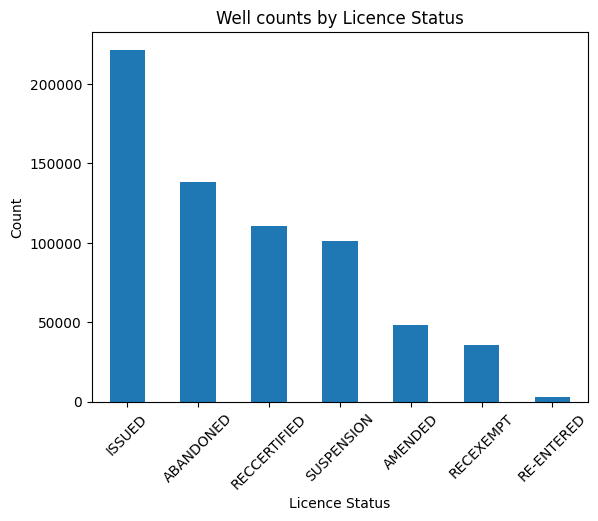

In [32]:
licence_status_counts = well_infrastructure['LicenceStatus'].value_counts()
licence_status_counts.plot(kind='bar')
plt.title("Well counts by Licence Status")
plt.xlabel("Licence Status")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [33]:
active_licenses = well_infrastructure[well_infrastructure['LicenceStatus'] == 'ISSUED']

top_companies = active_licenses['LicenseeName'].value_counts().head(5)

print("Top 5 Licensees with the Most Active Licenses:")
print(top_companies)

Top 5 Licensees with the Most Active Licenses:
LicenseeName
CANADIAN NATURAL RESOURCES LIMITED    42776
TORXEN ENERGY LTD.                    19853
EMBER RESOURCES INC.                  14091
IPC CANADA LTD.                       13624
LYNX ENERGY ULC                       10081
Name: count, dtype: int64


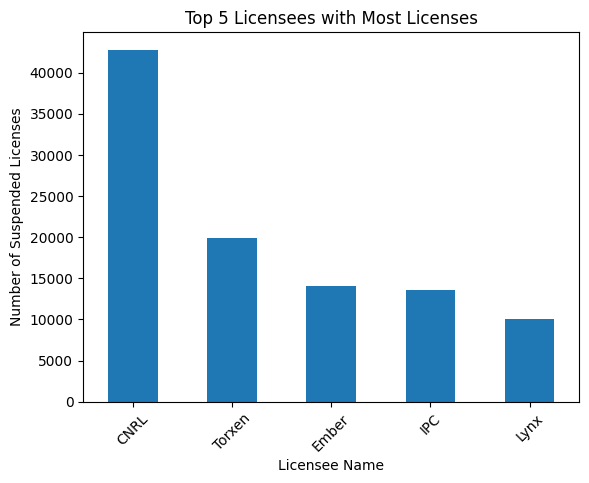

In [34]:
custom_labels = ["CNRL", "Torxen", "Ember", "IPC", "Lynx"]

top_companies.plot(kind='bar')
plt.title("Top 5 Licensees with Most Licenses")
plt.xlabel("Licensee Name")
plt.ylabel("Number of Suspended Licenses")
plt.xticks(rotation=45, ticks=range(len(custom_labels)), labels=custom_labels)
plt.show()

In [35]:
suspended_licenses = well_infrastructure[well_infrastructure['LicenceStatus'] == 'SUSPENSION']

top_licensees = suspended_licenses['LicenseeName'].value_counts().head(5)

print("Top 5 Licensees with the Most Suspended Licenses:")
print(top_licensees)

Top 5 Licensees with the Most Suspended Licenses:
LicenseeName
CANADIAN NATURAL RESOURCES LIMITED    30177
CENOVUS ENERGY INC.                    6722
SEQUOIA RESOURCES CORP.                3664
IMPERIAL OIL RESOURCES LIMITED         2616
TORXEN ENERGY LTD.                     2593
Name: count, dtype: int64


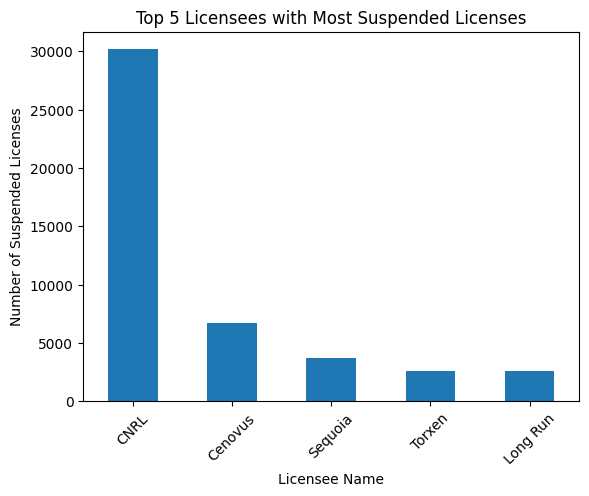

In [36]:
custom_labels = ["CNRL", "Cenovus", "Sequoia", "Torxen", "Long Run"]

top_licensees.plot(kind='bar')
plt.title("Top 5 Licensees with Most Suspended Licenses")
plt.xlabel("Licensee Name")
plt.ylabel("Number of Suspended Licenses")
plt.xticks(rotation=45, ticks=range(len(custom_labels)), labels=custom_labels)
plt.show()

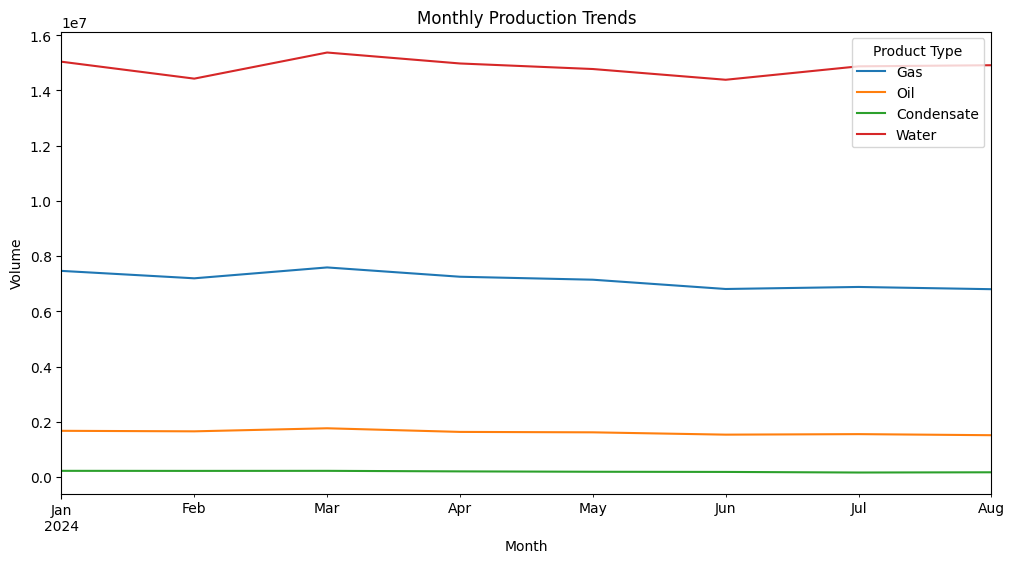

In [37]:
merged_ngl_df['ProductionMonth'] = pd.to_datetime(merged_ngl_df['ProductionMonth'])
monthly_trends = merged_ngl_df.groupby('ProductionMonth')[['GasProduction', 'OilProduction', 'CondensateProduction', 'WaterProduction']].sum()

monthly_trends.plot(figsize=(12, 6))
plt.title("Monthly Production Trends")
plt.xlabel("Month")
plt.ylabel("Volume")
plt.legend(['Gas', 'Oil', 'Condensate', 'Water'], title="Product Type")
plt.show()

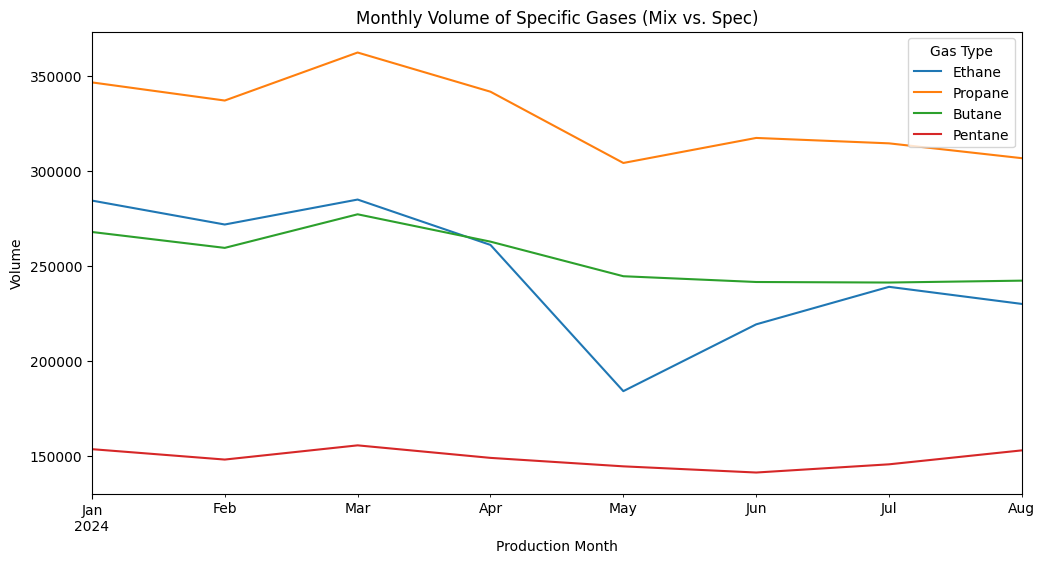

In [38]:
specific_gases = merged_ngl_df.groupby('ProductionMonth')[['EthaneMixVolume', 
                                                'PropaneMixVolume',  
                                                'ButaneMixVolume',  
                                                'PentaneMixVolume']].sum()

# Plot
specific_gases.plot(figsize=(12, 6))
plt.title("Monthly Volume of Specific Gases (Mix vs. Spec)")
plt.xlabel("Production Month")
plt.ylabel("Volume")
plt.legend(["Ethane", "Propane", "Butane", "Pentane"], title="Gas Type")
plt.show()

#### Data saving

In [39]:
final_dataset_folder = os.getenv('FINAL_DATA')

if os.path.isdir(final_dataset_folder):
    print('Directory is present')
else:
    os.mkdir(final_dataset_folder)
    print('Directory Created')

Directory is present


In [40]:
merged_ngl_df.to_csv(f'{final_dataset_folder}/ngl_data.csv', index=False)
merged_vol_df.to_csv(f'{final_dataset_folder}/vol_data.csv', index=False)
drilling_events.to_csv(f'{final_dataset_folder}/drilling_events.csv', index=False)
production_data.to_csv(f'{final_dataset_folder}/production_data.csv', index=False)
minable_oil_sands_well_data.to_csv(f'{final_dataset_folder}/oil_sands.csv', index=False)
well_infrastructure.to_csv(f'{final_dataset_folder}/well_infrastructure.csv', index=False)

#### Cleaning data in Power BI

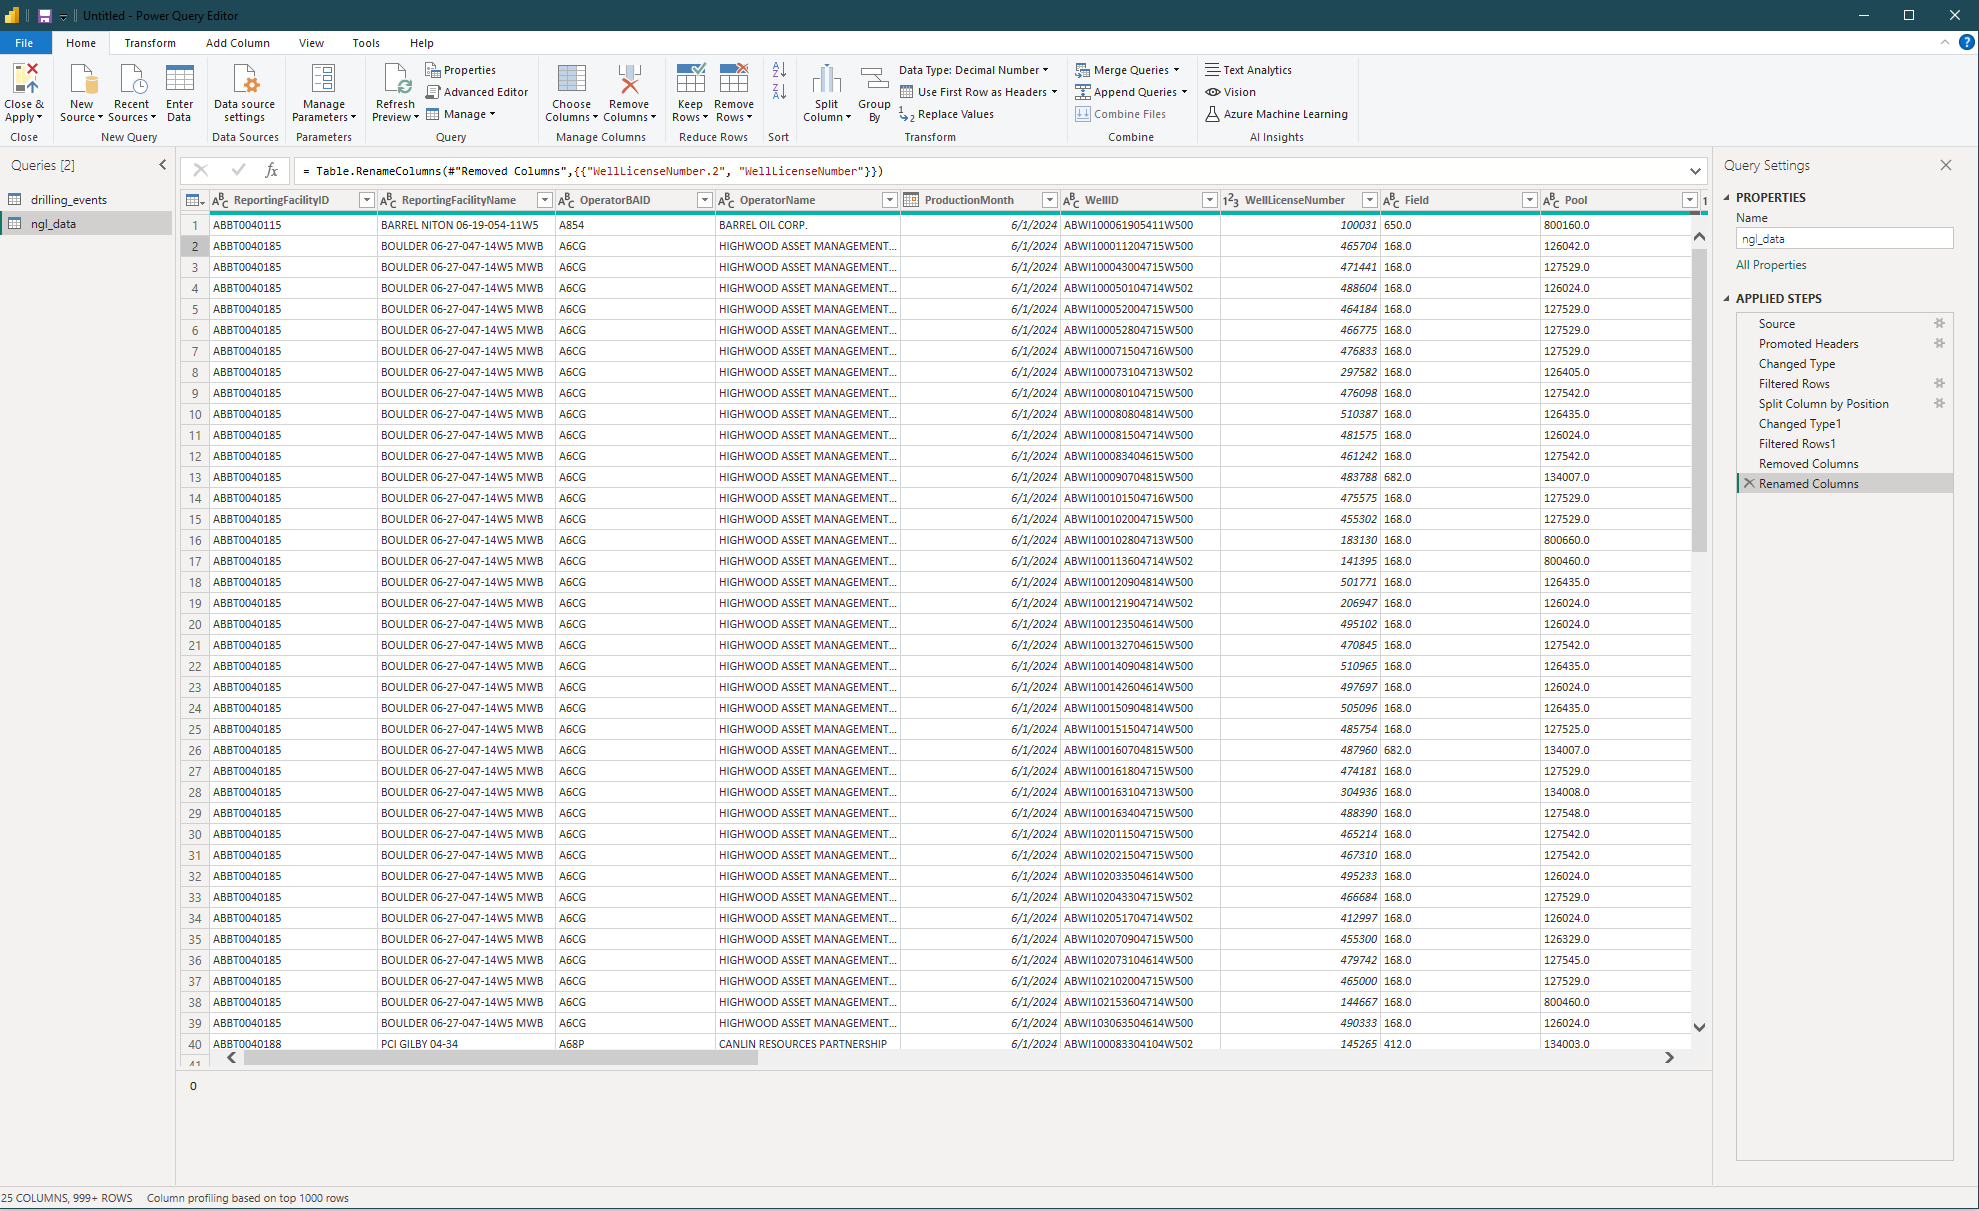